In [1]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for train/test split

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms


In [2]:
data = datasets.MNIST(root='./data', train=True, download=True, transform=None)
x = data.data.numpy()
y = data.targets.numpy()

# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

#Normalization
X_train = X_train/255.0
X_test = X_test/255.0


MNIST Dataset Shape:
X_train: (48000, 28, 28)
Y_train: (48000,)
X_test:  (12000, 28, 28)
Y_test:  (12000,)


In [3]:
''' # Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
'''

# Reshape the data to have 2D model

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print('Reshaped Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

#Y_train = Y_train.reshape(Y_train.shape[0], 1)
#Y_test = Y_test.reshape(Y_test.shape[0], 1)



Reshaped Dataset Shape:
X_train: (48000, 784)
X_test: (12000, 784)


In [4]:
#IMPORT LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
#LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter= 10000,random_state=16)

#b) fit model with data
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)


In [6]:
#Model evaluation and confusion matrix

'''
A confusion matrix is a table that is used to evaluate the performance of a classification model. 
You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is 
the number of correct and incorrect predictions summed up class-wise.


Explanation of the logistic regression:

Predicting the labels means that the logistic regression model is used to classify the images in 
the MNIST dataset. Specifically, each image in the dataset is of a handwritten digit (0 through 9), 
and the model is trained to recognize which digit each image represents.
'''

#import metrics class
from sklearn import metrics

In [24]:
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

'''

Confurion matrix: visualized as a heatmap provides a clear picture of the model's performance. 
Each row of the matrix represents the actual digit, and each column represents the predicted digit. 
The diagonal elements show the number of times the model correctly predicted each digit, 
while the off-diagonal elements show the number of misclassifications.
'''
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[1017    3    8    6    2   14   23    6   19    9]
 [   0 1332   13    8    4    6    4    4   14    7]
 [  22   16 1007   32   11   18   17   13   32   15]
 [  10   16   35 1049    9   59    8   22   40   27]
 [   5    7   18   10 1020   12   17   14   27   69]
 [  12    7   12   37   10  909   31    9   34   22]
 [  14    4   15    6   22   29 1047    7   27    8]
 [   2   18   23   20   13    3    3 1079   12   30]
 [  11   11   34   39   32   36   26   12  948   42]
 [  12    5   17   26   54   21    8   38   18  989]]


'\nThe diagonal elements (C(i,i)) represent \nthe number of correctly predicted instances for each class i.\n'

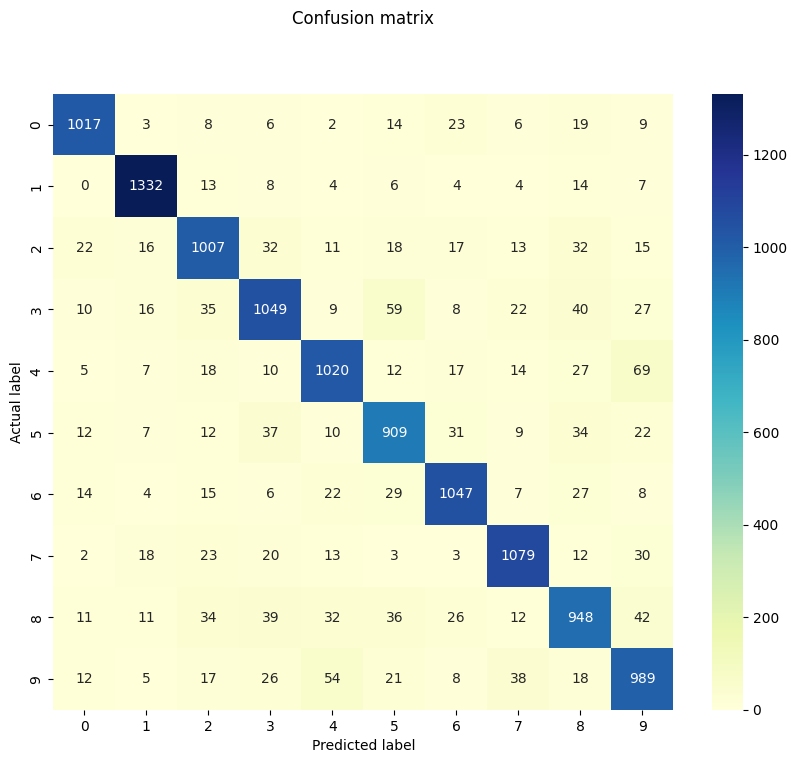

In [25]:
#create heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

'''
The diagonal elements (C(i,i)) represent 
the number of correctly predicted instances for each class i.
'''

In [26]:
#evaluate accuracy of model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [27]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [30]:
# Model AccuracyS
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.86575


In [31]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [33]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -------------------------------------- 278.7/278.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=826ed5723b94a79ed3d7ecf14b9ccdb8d91b69167181730608ea1f8cafa20020
  Stored in directory: c:\users\loisa\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [35]:
!pip install six pydotplus


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import six

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.data.numpy(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('MNIST')
Image(graph.create_png())